# IMPORTING REQUIRED LIBRARIES

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sci
import  seaborn as sb

### QUESTION 1 ANS: A.EXTEND(B)

In [19]:
A = [1,2,3,4,5,6]

In [20]:
B = [13, 21, 34]

In [22]:
A.extend(B)

In [23]:
print (A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


### QUESTION 2 ANS: NP.INDENTITY(3)

In [30]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [34]:
fuel_data = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")

In [35]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


### QUESTION 3 ANS: GAS

In [37]:
waste_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'waste']
waste_average['fuel_cost_per_unit_burned'].describe()

count    441.000000
mean      19.518122
std       29.988017
min     -276.080000
25%       10.335000
50%       21.933000
75%       32.650000
max      132.291000
Name: fuel_cost_per_unit_burned, dtype: float64

In [36]:
gas_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'gas']
gas_average['fuel_cost_per_unit_burned'].describe()

count    11486.000000
mean        13.659397
std        163.286631
min          0.000000
25%          3.230000
50%          4.650000
75%          6.960000
max      10490.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [38]:
oil_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'oil']
oil_average['fuel_cost_per_unit_burned'].describe()

count      8064.000000
mean        168.877086
std        2406.101479
min           0.000000
25%          37.610000
50%          68.945500
75%          98.689250
max      139358.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [39]:
coal_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'coal']
coal_average['fuel_cost_per_unit_burned'].describe()

count     8547.000000
mean        67.421830
std        943.771433
min          0.000000
25%         23.958500
50%         33.318000
75%         44.668000
max      44033.320000
Name: fuel_cost_per_unit_burned, dtype: float64

### QUESTION 4 ANS: 10.60 & 17.01

In [40]:
fuel_data['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

### QUESTION 5 ANS: 15.85 & 651.37

In [41]:
sci.skew(fuel_data['fuel_qty_burned'].dropna())

15.850690077422112

In [42]:
sci.kurtosis(fuel_data['fuel_qty_burned'].dropna())

651.2589365474387

### QUESTION 6 ANS: FEATURE: FUEL_UNIT, TOTAL:180, PERCENTAGE:0.61

In [43]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

### QUESTION 7 ANS: CATEGORICAL AND MODE

In [44]:
fuel_data['fuel_unit'].describe()

count     29343
unique        9
top         mcf
freq      11354
Name: fuel_unit, dtype: object

In [45]:
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

### QUESTION 8 ANS: FUEL_QTY_BURNED AND FUEL_MMBTU_PER_UNIT

In [46]:
corr = fuel_data.corr()

corr

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


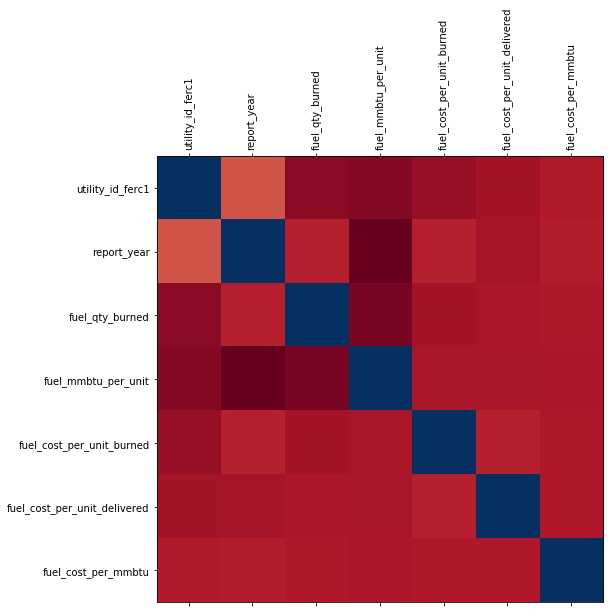

In [50]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

### QUESTION 9 ANS:

### QUESTION 10 ANS: 1997

In [51]:
fuel_data.groupby('report_year').agg({'fuel_cost_per_unit_delivered':'mean'})

,fuel_cost_per_unit_delivered
report_year,
1994,63.636060
1995,32.735269
1996,9196.705948
1997,11140.197239
1998,287.154420
1999,25.551627
2000,985.362877
2001,60.050396
2002,47.594361
